# Import required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# One hot encoding

In [4]:
#insurance["sex"] = [1 if each == "male" else 0 for each in insurance.sex]
#insurance["smoker"] = [1 if each == "yes" else 0 for each in insurance.smoker]
#insurance["region"] = [0 if each == "southeast" else 1 if each == "southwest" else 2 if each == "northwest" else 3 for each in insurance.region]

In [5]:
dt = pd.get_dummies(insurance)
dt

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


# Create X & y values (features and labels)

In [7]:
X = dt.drop(["charges"], axis=1)
y = dt.charges

In [8]:
# View X
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [9]:
# View y
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Create training and test sets

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_tr, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)
print("len of X_train: {}\nlen of X_test: {}\nlen of y_train: {}\nlen of y_test: {}\n".format(len(x_train), len(x_test), len(y_tr), len(y_tst)))

len of X_train: 1070
len of X_test: 268
len of y_train: 1070
len of y_test: 268



# Convert datasets into tensors

In [11]:
X_train = tf.constant(x_train)
X_test = tf.constant(x_test)
y_train = tf.constant(y_tr)
y_test = tf.constant(y_tst)

# Build a neural networks

In [12]:
tf.random.set_seed(42)

# 1. Create the model
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8614.5596 - mae: 8614.5596
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7849.2935 - mae: 7849.2935
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7552.1699 - mae: 7552.1699
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7689.4736 - mae: 7689.4736
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7677.9575 - mae: 7677.9575
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7587.9619 - mae: 7587.9619
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7626.7861 - mae: 7626.7861
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7799.7378 - mae: 7799.7378
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7575.4668 - mae: 7575.4668
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7648.8159 - mae: 7648.8159

# Check results of the model on the test data

In [13]:
model_1_evaluate = model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7235.9268 - mae: 7235.9268


# Make predictions

In [15]:
y_preds = model_1.predict(X_test)
mae = tf.keras.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_preds))
mae

9/9 [==============================] - 0s 10ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=7235.9272>

In [ ]:
#plt.scatter(X_train, y_train, c="b", label="training")
plt.scatter(x_test, y_test, c="r", label="testing")
plt.scatter(x_test, y_preds, c="green", label="predicts")
plt.legend()
plt.show()

# Improving our model

To try improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Same as above for train for longer

## First try

In [16]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13161.4365 - mae: 13161.4365
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12332.8848 - mae: 12332.8848
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 10180.7617 - mae: 10180.7617
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7719.4043 - mae: 7719.4043
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7404.3862 - mae: 7404.3862
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7362.7441 - mae: 7362.7441
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7314.3628 - mae: 7314.3628
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7275.6060 - mae: 7275.6060
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7235.0405 - mae: 7235.0405
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7195.5171 - mae: 719

In [17]:
model_2_evaluate = model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3512.8254 - mae: 3512.8254


In [27]:
# 1. Create the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
#model_3.fit(X_train, y_train, epochs=1000, verbose=0)

In [19]:
model_3_evaluate = model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3253.5728 - mae: 3253.5728


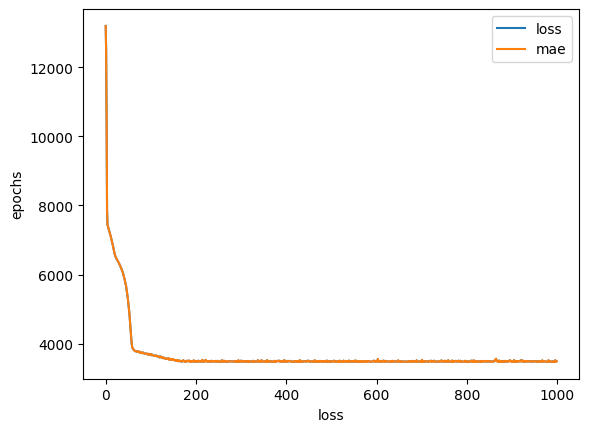

In [28]:
history = model_3.fit(X_train, y_train, epochs = 1000, verbose=0)
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")
plt.show()

**How long should you train for ?**

It depends.. Tensorflow has a solution! It's called the EarlyStopping Callback which is TensorFlow component we can add to or model to stop training once it stops improving a certain metrics

In [30]:
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = model_4.fit(X_train, y_train, epochs=1000, callbacks=[callback], verbose=0)

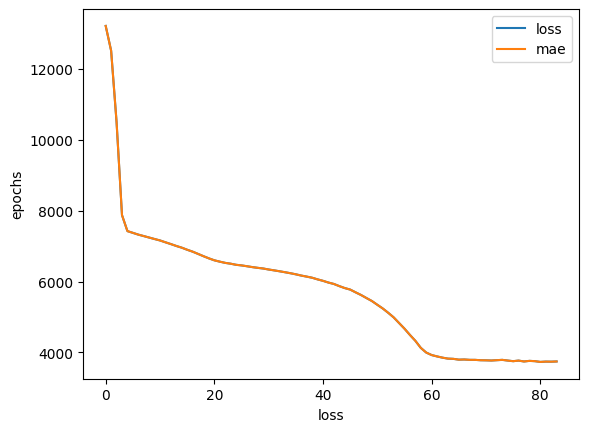

In [31]:
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")
plt.show()

## Preprocessing data (normalization and standardization)

`Normalization` - Converts all values to between 0 and 1 whilist preserving the original distribution. Use as default scaler with neural networks.

`Standardization` - Removes the mean and divides each value by the standart deviation. Transform a feature to have close to normal distribution ( cation: this reduces the effect of outliers).

In terms of scaling values, neural networks tend to prefer normalization.

If you are not sure which to use, you could try both and see which performs better.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1.
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y values
X = insurance.drop("charges", axis=1)
y = insurance.charges

# Build train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [40]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [41]:
# 1. Create the model

newModel = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
newModel.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"])

history = newModel.fit(X_train_normal, y_train, epochs= 200, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)])

Epoch 1/200
34/34 [==============================] - 3s 4ms/step - loss: 13340.4736 - mae: 13340.4736
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13303.4893 - mae: 13303.4893
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13172.7715 - mae: 13172.7715
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12854.9629 - mae: 12854.9629
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 12246.0264 - mae: 12246.0264
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 11293.0156 - mae: 11293.0156
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 10194.9639 - mae: 10194.9639
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 9173.5039 - mae: 9173.5039
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 8468.3125 - mae: 8468.3125
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 8080.0132 - 

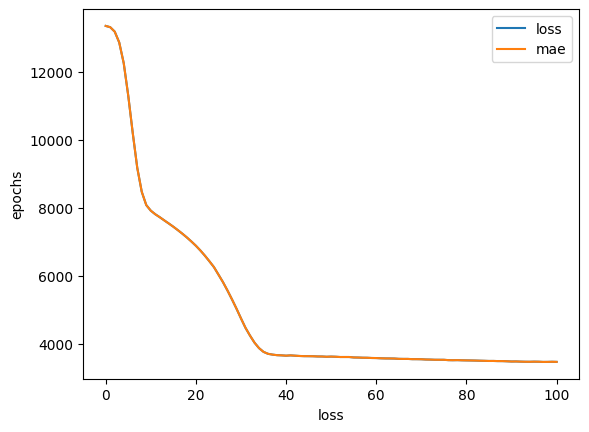

In [42]:
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")
plt.show()

In [45]:
newModel.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3165.6311 - mae: 3165.6311


[3165.631103515625, 3165.631103515625]

model_3.evaluate()
`9/9 [==============================] - 0s 3ms/step - loss: 3253.5728 - mae: 3253.5728`